

    
<center>
<img src="" />
        
# Diplo Cs Datos 2021

**Ejemplo Bancos**
Variable respuesta categorías de consumo


In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import os
import numpy as np


# Gráficos
# ==============================================================================

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns



# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


**Base de clientes de un banco**

TV: si tiene tarjeta visa

TC: si tiene tarjeta del banco

saldo res : saldo del ultimo resumen 

antc: antigüedad en la cuenta 

cons:	ultimos  consumos mensuales 

antig_pp:	antigüedad en prestamos personales 

endeu:	tasa de endeudamiento

conscateg:	consumo en cateogiras (4)

ESTADO_CIVIL:	1-soltero, 2 casado/conviviente , 3 divorciado/viudo

SEXO:	1 varon, 2 mujer

riesgo: Bajo, Alto


In [2]:
# Base de datos 
# ==============================================================================
url = 'https://drive.google.com/file/d/1JQbD1tQJsMPmfKd7ufkuF0DK1BNDN8lE/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_table(path)

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2488 non-null   int64  
 1   TV            2488 non-null   int64  
 2   antc          2488 non-null   int64  
 3   saldores      2488 non-null   float64
 4   TC            2488 non-null   int64  
 5   cons          2488 non-null   float64
 6   edad          2488 non-null   int64  
 7   ESTADO_CIVIL  2488 non-null   int64  
 8   SEXO          2488 non-null   int64  
 9   antig_pp      2488 non-null   int64  
 10  ingresos      2488 non-null   float64
 11  endeud        2488 non-null   float64
 12  riesgo        2488 non-null   object 
 13  conscateg     2488 non-null   int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 272.2+ KB


,id,TV,antc,saldores,TC,cons,edad,ESTADO_CIVIL,SEXO,antig_pp,ingresos,endeud,conscateg
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.000000,2488.000000,2488.00000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,6654.606511,0.389871,67.761656,13530.722630,1.0,64385.664772,43.063505,1.41881,1.516881,18.528939,36077.647727,211.907609,2.475884
std,4506.300139,0.487819,36.618056,14308.202528,0.0,58084.038010,9.611052,0.63271,0.499815,10.818269,21657.464009,1338.695648,1.055469
min,104.000000,0.000000,2.000000,3.850432,1.0,83.252589,20.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3474.250000,0.000000,35.000000,4666.751419,1.0,21904.692707,36.000000,1.00000,1.000000,10.000000,22937.983753,0.244951,2.000000
50%,5231.000000,0.000000,66.000000,9723.734711,1.0,50034.493670,43.000000,1.00000,2.000000,17.000000,34475.704320,0.361665,3.000000
75%,8814.000000,1.000000,104.000000,17819.285825,1.0,88009.213905,51.000000,2.00000,2.000000,26.000000,45672.101380,0.502146,3.000000
max,19998.000000,1.000000,115.000000,238833.951400,1.0,347033.329500,59.000000,3.00000,2.000000,60.000000,268459.494300,18868.290000,4.000000


### Armemos ahora un conjunto de test y otro de test para calcular generalizacion de los métodos

In [3]:
from sklearn.model_selection import train_test_split

# Create X and y
#X = df.drop(["conscateg"],axis = 1)
#y = df. conscateg
X=data.drop(["id","conscateg","TC", "riesgo", 'cons'],axis = 1) #features variables clasificadoras
y=data.conscateg # target o grupo

# Split the data to 80-20


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

### Cada método tiene muchos parámetros, para que sean comparables, hay que buscar los mejores parámetros usando la muestra de entrenamiento.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Clasificadores

AdaBoostClassifier: este algoritmo comienza ajustando un clasificador en el conjunto de datos original y luego ajusta copias adicionales del clasificador en el mismo conjunto de datos pero donde los pesos de las instancias clasificadas incorrectamente se ajustan de modo que los clasificadores posteriores se centren más en casos difíciles.

Bagging Classifier: es un algoritmo que ajusta clasificadores base, cada uno en un subconjunto aleatorio del conjunto de datos original y luego agrega su prediccion individual(ya sea por voto o promedio) para formar una prediccion final.El objetivo es generar un modelo compuesto con menor tasa de error.

ExtraTreesClassifier: este algoritmo implementa un estimador que se ajusta a varios árboles de decisión aleatorios (también conocidos como árboles adicionales) en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

GradientBoostingClassifier: este algoritmo construye un modelo aditivo de manera progresiva por etapas. Permite la optimización de funciones arbitrarias de pérdida diferenciable. En cada etapa, las n_clases de los árboles de regresión se ajustan en el gradiente negativo de la función de pérdida de desviación binomial o multinomial. La clasificación binaria es un caso especial donde solo se induce un solo árbol de regresión.

RandomForestClassifier: un bosque aleatorio es un estimador que se ajusta a varios clasificadores de árbol de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste. El tamaño de la submuestra siempre es el mismo que el tamaño de la muestra de entrada original, pero las muestras se extraen con reemplazo y a diferencia de Bagging tambien se aleatorizan las variables.

LogisticRegression : la regresión logística es un método estadístico para analizar un conjunto de datos en el que hay una o más variables independientes que determinan un resultado. El resultado se mide con una variable dicotómica. En este modelo, las probabilidades que describen los posibles resultados de un solo ensayo se modelan utilizando una función logística.


KNeighborsClassifier: Clasificador que implementa el voto de k-vecinos más cercanos.

SVC: Usa un clasificador discriminativo definido formalmente por un hiperplano de separación. Es decir, dados los datos de entrenamiento etiquetados, el algoritmo genera un hiperplano óptimo que categoriza nuevos ejemplos. En dos espacios dimensionales, este hiperplano es una línea que divide un plano en dos partes donde en cada clase se encuentra a cada lado.


DecisionTree: los árboles de decisión son un método de aprendizaje supervisado no paramétrico utilizado para la clasificación y la regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante el aprendizaje de reglas de decisión simples inferidas de las características de los datos.


ExtraTreeClassifier: estos algoritmos difieren de los árboles de decisión clásicos en la forma en que se construyen. Al buscar la mejor división para separar las muestras de un nodo en dos grupos, se dibujan divisiones aleatorias para cada una de las características max_features seleccionadas aleatoriamente y se elige la mejor división entre ellas. Cuando max_features se establece en 1, esto equivale a construir un árbol de decisión totalmente aleatorio.


XGBoost: es un algoritmo de aprendizaje automático de conjunto basado en un árbol de decisión que utiliza un marco de refuerzo de gradiente.

In [7]:
#Clasificadores usuales
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
#Evaluaciones usuales de los modelos
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

# K vecinos mas cercanos

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
pipe_knn = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
    ])

params_knn = {
    'knn__n_neighbors': range(1, 20)
    }

search_knn = GridSearchCV(estimator=pipe_knn,
                      param_grid=params_knn,
                      cv = 5,
                      return_train_score=True)

search_knn.fit(X_train, y_train)
print(f" Best score is: {search_knn.best_score_} with parameters: {search_knn.best_params_}")

 Best score is: 0.4452261306532663 with parameters: {'knn__n_neighbors': 19}


### El único parametro es K, encontro que el mejor k en ¿? vecinos

In [136]:
knn = KNeighborsClassifier(n_neighbors = 19)
# Train the model
knn.fit(X_train, y_train)
# Get the predict value from X_test
y_pred_knn = knn.predict(X_test)

In [137]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [138]:
# Report
print(classification_report(y_pred_knn,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_knn, y_test))


              precision    recall  f1-score   support

           1      0.675     0.733     0.703       105
           2      0.570     0.507     0.537       152
           3      0.581     0.537     0.558       160
           4      0.515     0.642     0.571        81

    accuracy                          0.586       498
   macro avg      0.585     0.605     0.592       498
weighted avg      0.587     0.586     0.584       498

accuracy:  0.5863453815261044


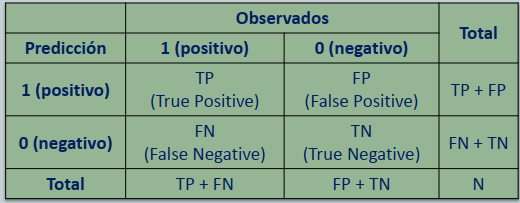


**precision**  
Valor predictivo positivo: TP / (TP + FP)
La precisión es la capacidad del clasificador en términos de probabilidad de que las predcciones hechas sean las correctas

**recall** 
Sensibilidad TP / (TP + FN)  Es la capacidad del clasificador de para identificar los valores del grupo positivo.

**f1-score**
La puntuación de la F1 puede interpretarse como un promedio ponderado de la precisión y la memoria (recall). La fórmula para la puntuación de la F1 es:
F1 = 2 * (precision * recall) / (precision + recall)
donde la puntuación de la F1 alcanza su mejor valor en 1 y la peor puntuación en 0. El valor 1 significa que la contribución relativa de la precisión y la memoria a la puntuación de la F1 son iguales.
En el caso de múltiples clases y múltiples etiquetas, este es el promedio de la puntuación F1 de cada clase con una ponderación que depende del parámetro average .

**support** es el número de clasificados de cada clase en y_true .

Para mirar esto y más:

https://runebook.dev/es/docs/scikit_learn/modules/model_evaluation#precision-recall-f-measure-metrics

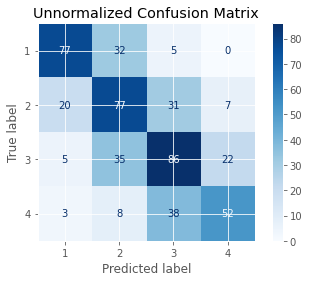

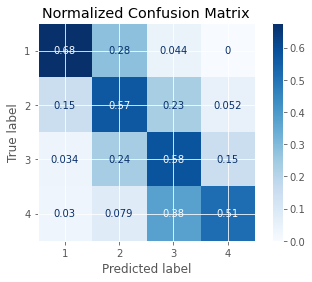

In [139]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Unnormalized Confusion Matrix", None),
                  ("Normalized Confusion Matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['1', '2', '3', '4'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

# Arbol de decision

In [140]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

pipe_decsT = Pipeline([
    ('sc', StandardScaler()),
    ('decsT', DecisionTreeClassifier())
    ])

params_decsT = {
    'decsT__criterion' : ['gini', 'entropy'],
    'decsT__max_depth' : np.arange(3, 15)
    }

search_decsT = GridSearchCV(estimator=pipe_decsT,
                      param_grid=params_decsT,
                      cv = 5,
                      return_train_score=True)

search_decsT.fit(X_train, y_train)
print(f" Best score is: {search_decsT.best_score_} with parameters: {search_decsT.best_params_}")

 Best score is: 0.5819095477386935 with parameters: {'decsT__criterion': 'gini', 'decsT__max_depth': 4}


### Encontramos que la metrica Gini y la profundidad es ??

In [141]:
scores_decsT = search_decsT.cv_results_['mean_test_score']
criterion = ['gini', 'entropy']
DEPTH = np.arange(2, 15)
for idx, criterion in enumerate(criterion):
    for score, depth in (zip(scores_decsT[idx*len(DEPTH): (idx+1)*len(DEPTH)], DEPTH)):
        print(f"{depth, criterion}: {score:.10f}")

(2, 'gini'): 0.5748743719
(3, 'gini'): 0.5819095477
(4, 'gini'): 0.5643216080
(5, 'gini'): 0.5457286432
(6, 'gini'): 0.5432160804
(7, 'gini'): 0.5396984925
(8, 'gini'): 0.5221105528
(9, 'gini'): 0.5080402010
(10, 'gini'): 0.4964824121
(11, 'gini'): 0.4919597990
(12, 'gini'): 0.5005025126
(13, 'gini'): 0.4919597990
(14, 'gini'): 0.5592964824
(2, 'entropy'): 0.5597989950
(3, 'entropy'): 0.5613065327
(4, 'entropy'): 0.5497487437
(5, 'entropy'): 0.5276381910
(6, 'entropy'): 0.5195979899
(7, 'entropy'): 0.5060301508
(8, 'entropy'): 0.4994974874
(9, 'entropy'): 0.4934673367
(10, 'entropy'): 0.4904522613
(11, 'entropy'): 0.4969849246
(12, 'entropy'): 0.4929648241


In [142]:
decsT = DecisionTreeClassifier(max_depth=3)
decsT.fit(X_train,y_train)
y_pred_decsT = decsT.predict(X_test)

In [143]:
# Report
print(classification_report(y_pred_decsT,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_decsT,y_test))

              precision    recall  f1-score   support

           1      0.491     0.848     0.622        66
           2      0.689     0.460     0.552       202
           3      0.588     0.527     0.556       165
           4      0.465     0.723     0.566        65

    accuracy                          0.568       498
   macro avg      0.558     0.640     0.574       498
weighted avg      0.600     0.568     0.564       498

accuracy:  0.5682730923694779


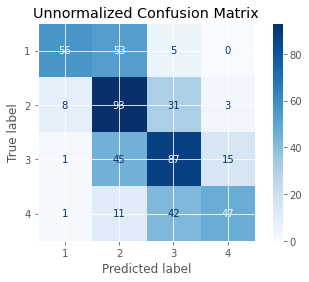

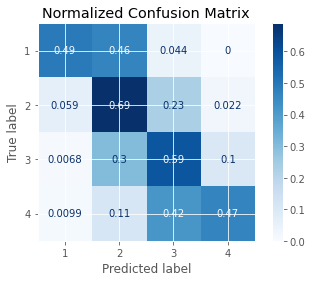

In [144]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(decsT.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['1', '2', '3', '4'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

# Logistic regression

In [145]:
from sklearn.linear_model import LogisticRegression

solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
C = np.logspace(-2, 10, 13)

pipe_lr = Pipeline([
    ('sc', StandardScaler()),
    ('LR', LogisticRegression())
    ])

params_lr = {
    'LR__C': C,
    'LR__solver': solver
    }

search_lr = GridSearchCV(estimator=pipe_lr,
                      param_grid=params_lr,
                      cv = 5,
                      return_train_score=True)

search_lr.fit(X_train, y_train)
print(f" Best score is: {search_lr.best_score_} with parameters: {search_lr.best_params_}")

 Best score is: 0.5507537688442211 with parameters: {'LR__C': 10.0, 'LR__solver': 'newton-cg'}


In [146]:
lr = LogisticRegression(C=10, solver='newton-cg') 
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [147]:
# Report
print(metrics.classification_report(y_pred_lr,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_lr,y_test))

              precision    recall  f1-score   support

           1      0.772     0.667     0.715       132
           2      0.496     0.493     0.494       136
           3      0.561     0.503     0.530       165
           4      0.416     0.646     0.506        65

    accuracy                          0.562       498
   macro avg      0.561     0.577     0.562       498
weighted avg      0.580     0.562     0.566       498

accuracy:  0.5622489959839357


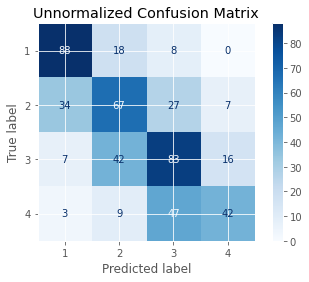

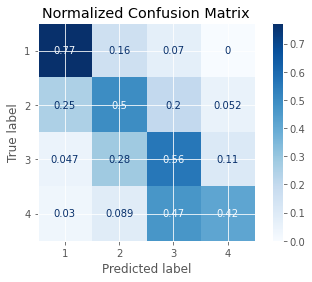

In [148]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['1', '2', '3', '4'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

## Gradient Boosting Classifier

### A continuación se pretende realizar un mejoramiento de los parámetros del algoritmo Gradient Boosting Classifier. Para ello se probarán diferentes combinaciones de algunos parámetros que seran considerados dentro de ciertos rangos y se buscara la combinación óptima. Los parámetros que se utilizaran con valores diferentes a los establecidos por defecto son: **min_samples_split**, **subsample**,**max_depth**, **learning_rate**, **n_estimators**.

In [149]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
params = {
        'min_samples_split':[180, 370],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3,8]
        }
GBC =  ensemble.GradientBoostingClassifier(learning_rate=0.02, n_estimators=600,min_samples_leaf = 50, warm_start=True)
folds = 3
param_comb = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(GBC, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )
random_search.fit(X_train,y_train)
print('\n Mejores hypermarametros:')
print(random_search.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:   50.8s remaining:   25.4s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:   54.9s finished



 Mejores hypermarametros:
{'subsample': 0.6, 'min_samples_split': 180, 'max_depth': 8}


**El clasificador Gradient Boosting queda determinado por los siguientes parametros:**

In [150]:
ejemplos = np.array([[ 'Parametro', 'Valor'],
['criterion', 'friedman_mse'], 
['init', 'None'],
['learning_rate', 0.02], 
['loss', 'deviance'], 
['max_depth' ,3],
['max_features', 'None'], 
['max_leaf_nodes','None'],
['min_impurity_decrease',0.0], 
['min_impurity_split','None'],
['min_samples_leaf',50], 
['min_samples_split',180],
['min_weight_fraction_leaf',0.0], 
['n_estimators', 600],
['n_iter_no_change','None'], 
['presort','auto'],
['random_state','None'], 
['subsample',0.6], 
['tol', 0.0001],
['validation_fraction',0.1], 
['verbose',0], 
['warm_start',True]])
Parametros = pd.DataFrame(data=ejemplos[1:,0:],
                   columns = ejemplos[0,0:])

In [151]:
GBC=ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=180,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None,
                           random_state=None, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)
GBC_model  = GBC.fit(X_train,y_train)

y_pred_GBC = GBC.predict(X_test)

print('Exactitud del clasificador Gradient Boost Classifier en la base de prueba: {:.2f}'.format(GBC.score(X_test, y_test)))

Exactitud del clasificador Gradient Boost Classifier en la base de prueba: 0.58


In [152]:
print(metrics.classification_report(y_pred_GBC,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_GBC,y_test))

              precision    recall  f1-score   support

           1      0.649     0.740     0.692       100
           2      0.481     0.461     0.471       141
           3      0.588     0.544     0.565       160
           4      0.624     0.649     0.636        97

    accuracy                          0.580       498
   macro avg      0.586     0.599     0.591       498
weighted avg      0.577     0.580     0.578       498

accuracy:  0.5803212851405622


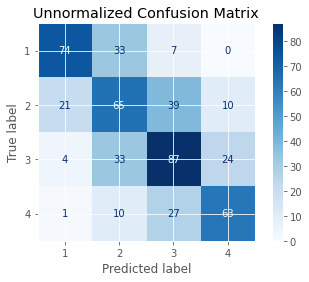

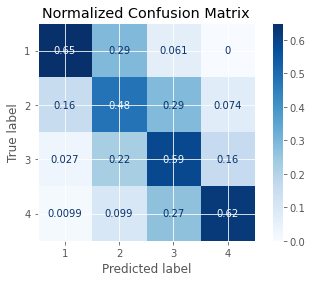

In [153]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GBC_model, X_test, y_test,
                                  display_labels=['1', '2', '3', '4'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

# XGboost
XGBoost es un algoritmo de aprendizaje automático de conjunto basado en un árbol de decisión que utiliza un marco de refuerzo de gradiente.

## Parametros generales
Se relacionan con el refuerzo que estamos utilizando para impulsar, comúnmente árbol o modelo lineal

booster [default= gbtree ] Qué booster usar. Puede ser gbtree, gblinear o dart; gbtree y dart usan modelos basados en árboles, mientras que gblinear usa funciones lineales.

silent [default=0] [Deprecated] Obsoleto. Por favor, use verbosidad en su lugar.

verbosity [default=1] Verbosidad de la impresión de mensajes. Los valores válidos son 0 (silencioso), 1 (advertencia), 2 (información), 3 (depuración). A veces, XGBoost intenta cambiar las configuraciones en función de la heurística, que se muestra como mensaje de advertencia. Si hay un comportamiento inesperado, intente aumentar el valor de la verbosidad.

nthread [default to maximum number of threads available if not set] Número de subprocesos paralelos utilizados para ejecutar XGBoost.

disable_default_eval_metric [default=0] Marcador para deshabilitar la métrica predeterminada. Establezca en> 0 para deshabilitar.

num_pbuffer [set automatically by XGBoost, no need to be set by user] Tamaño del búfer de predicción, normalmente establecido en el número de instancias de entrenamiento. Los buffers se utilizan para guardar los resultados de predicción del último paso de refuerzo.

num_feature [set automatically by XGBoost, no need to be set by user] Dimensión de la característica utilizada para impulsar, establecer en la dimensión máxima de la característica.

Analogamente a lo hecho con anterioridad se pretende realizar un mejoramiento de los parámetros del clasificador XGBoost. Para ello se probarán diferentes combinaciones de algunos parámetros que seran considerados dentro de ciertos rangos y se buscara la combinación óptima. Los parámetros que se modificaran son algunos de los que estan relacionados con párametros generales y párametros del árbol: min_child_weight,gamma,subsample,colsample_bytree, max_depth, learning_rate, objective, nthread.

In [154]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
        
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [155]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
#timer(start_time) # timing ends here for "start_time" variable

print('\n Mejores hyperparametros:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   29.1s finished



 Mejores hyperparametros:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}


In [156]:

from xgboost import XGBClassifier
from datetime import datetime

In [157]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.02,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
       n_estimators=600, n_jobs=1, nthread=1, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

XGB=xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print('Accuracy of XGBClassifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))

Accuracy of XGBClassifier on test set: 0.60


In [158]:
# Report
print(metrics.classification_report(y_pred_xgb,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           1      0.623     0.772     0.689        92
           2      0.526     0.504     0.514       141
           3      0.676     0.538     0.599       186
           4      0.554     0.709     0.622        79

    accuracy                          0.598       498
   macro avg      0.595     0.630     0.606       498
weighted avg      0.604     0.598     0.595       498

accuracy:  0.5983935742971888


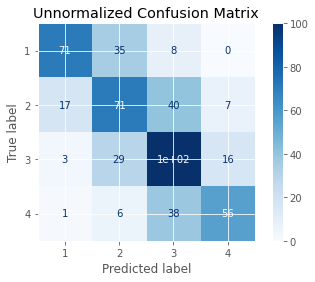

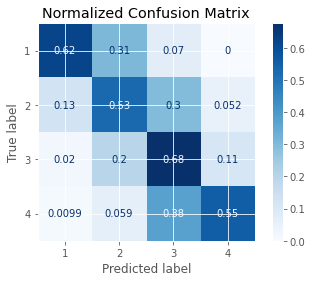

In [159]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(XGB, X_test, y_test,
                                  display_labels=['1', '2', '3', '4'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

#**Random forest**

In [160]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train)

# prediction on test set
y_pred_RF=RF.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print('Accuracy of XGBClassifier on test set: {:.2f}'.format(RF.score(X_test, y_test)))


Accuracy of XGBClassifier on test set: 0.61


In [161]:
# Report
print(metrics.classification_report(y_pred_RF,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_RF,y_test))

              precision    recall  f1-score   support

           1      0.640     0.777     0.702        94
           2      0.526     0.500     0.513       142
           3      0.649     0.545     0.593       176
           4      0.614     0.721     0.663        86

    accuracy                          0.606       498
   macro avg      0.607     0.636     0.618       498
weighted avg      0.606     0.606     0.603       498

accuracy:  0.606425702811245


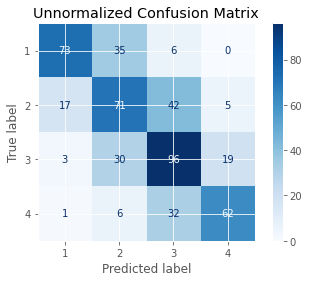

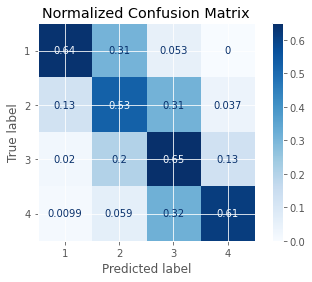

In [162]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(RF, X_test, y_test,
                                  display_labels=['1', '2', '3', '4'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)